<a href="https://colab.research.google.com/github/VensaHerald/titania/blob/master/titania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
uploaded = files.upload()
df_t = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_t.head()

Saving train.csv to train (1).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Did more men or women die on the Titanic

In [13]:
df_t[df_t["Survived"]==0]["Sex"].value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [45]:
df_t[df_t["Age"].isna()].shape[0]/df_t.shape[0]

0.19865319865319866

What was the average age of those who died, and those who survived

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 79., 150.,  54.,   6.,   1.]),
 array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 5 Patch objects>)

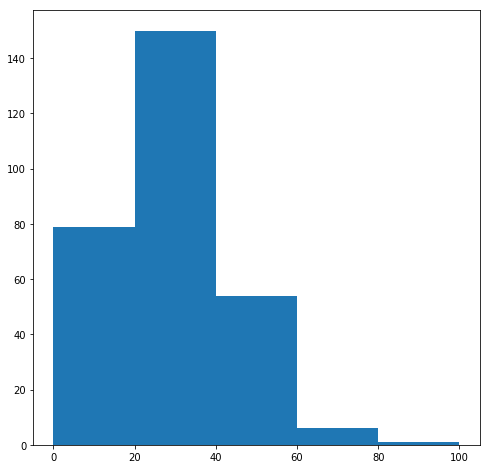

In [32]:
survived = df_t[df_t["Survived"] == 1]
died = df_t[df_t["Survived"] == 0]


fig, ax = plt.subplots(figsize=(8,8))

ax.hist(survived["Age"],bins=5 ,range=(0,100))



